<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Currency_Exchange_Rate_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-v0_8-whitegrid')

data = pd.read_csv("USDINRX.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.615002  45.709999  45.709999     0.0
1  2003-12-02  45.709000  45.719002  45.560001  45.629002  45.629002     0.0
2  2003-12-03  45.632000  45.655998  45.474998  45.549999  45.549999     0.0
3  2003-12-04  45.548000  45.612999  45.519001  45.548000  45.548000     0.0
4  2003-12-05  45.549999  45.566002  45.449001  45.449001  45.449001     0.0


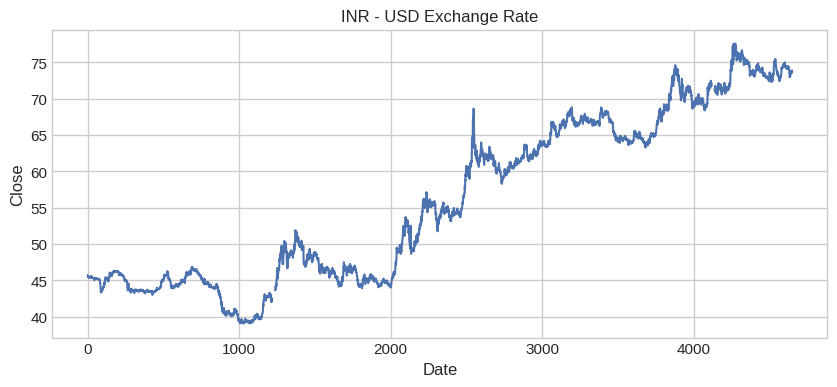

In [2]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.999821  0.999776  0.999888   0.999888     NaN
High       0.999821  1.000000  0.999692  0.999814   0.999814     NaN
Low        0.999776  0.999692  1.000000  0.999768   0.999768     NaN
Close      0.999888  0.999814  0.999768  1.000000   1.000000     NaN
Adj Close  0.999888  0.999814  0.999768  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


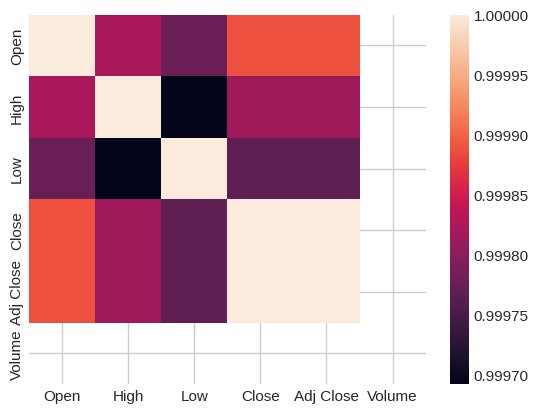

In [4]:
print(data.drop(columns=['Date']).corr()) # Drop the 'Date' column before calculating correlation
sns.heatmap(data.drop(columns=['Date']).corr()) # Drop the 'Date' column before creating the heatmap
plt.show()

In [5]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(data[['Close']])
data['Close'] = imputer.transform(data[['Close']])

x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [10]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       46.389999
1       43.650002
2       45.325001
3       62.171001
4       45.487999
